In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt


from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
# Checking for shape.
df.shape

(7668, 15)

In [5]:
# check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} . {}%'.format(col, pct_missing))

name . 0.0%
rating . 0.010041731872717789%
genre . 0.0%
year . 0.0%
released . 0.0002608242044861763%
score . 0.0003912363067292645%
votes . 0.0003912363067292645%
director . 0.0%
writer . 0.0003912363067292645%
star . 0.00013041210224308815%
country . 0.0003912363067292645%
budget . 0.2831246739697444%
gross . 0.02464788732394366%
company . 0.002217005738132499%
runtime . 0.0005216484089723526%


Some Rows contain null values.

In [6]:
# Removing all rows that contan null values

df = df.dropna()

In [7]:
# Checking the size after removing null values

df.shape

(5421, 15)

In [8]:
# Checking for data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Changing data types

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [10]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [11]:
df['released'] = df['released'].astype('str').str[:-15]
df['released']

0           June 13, 1980 
1            July 2, 1980 
2           June 20, 1980 
3            July 2, 1980 
4           July 25, 1980 
               ...        
7648     January 17, 2020 
7649    February 14, 2020 
7650     January 17, 2020 
7651    February 21, 2020 
7652      August 28, 2020 
Name: released, Length: 5421, dtype: object

In [12]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year            released  score    votes         director  \
0     1980      June 13, 1980     8.4   927000  Stanley Kubrick   
1     1980       July 2, 1980     5.8    65000   Randal Kleiser   
2     1980      June 20, 1980     8.7  1200000   Irvin Kershner   
3     1980       July 2, 1980     7.7   221000     Jim Abrahams   
4     1980      July 25, 1980     7.3   108000     Harold Ramis   
...    ...                 ...    ...      ...              ...   
7648  2020   January 17, 2020     6.6   140000     Adil El Arbi   
7649  2020  February 14, 2020     6.5   102000      Jeff Fowler   
7650  2020   January 17, 2020     5.6    53000   Stephen Gaghan   
7651  2020  February 21, 2020     6.8    42000    Chris Sanders   
7652  2020    August 28, 2020     6.8     3700          Hu Guan   

                       writer               star         country     budget  \
0                Stephen King     Jack Nicholson  United Kingdom   19000000   
1     Henry De Vere Stacpoole     Brooke Shields   United States    4500000   
2              Leigh Brackett        Mark Hamill   United States   18000000   
3                Jim Abrahams        Robert Hays   United States    3500000   
4          Brian Doyle-Murray        Chevy Chase   United States    6000000   
...                       ...                ...             ...        ...   
7648              Peter Craig         Will Smith   United States   90000000   
7649                Pat Casey       Ben Schwartz   United States   85000000   
7650           Stephen Gaghan  Robert Downey Jr.   United States  175000000   
7651            Michael Green      Harrison Ford          Canada  135000000   
7652                  Hu Guan    Zhi-zhong Huang           China   80000000   

          gross                              company  runtime  
0      46998772                         Warner Bros.    146.0  
1      58853106                    Columbia Pictures    104.0  
2     538375067                            Lucasfilm    124.0  
3      83453539                   Paramount Pictures     88.0  
4      39846344                       Orion Pictures     98.0  
...         ...                                  ...      ...  
7648  426505244                    Columbia Pictures    124.0  
7649  319715683                   Paramount Pictures     99.0  
7650  245487753                   Universal Pictures    101.0  
7651  111105497                 20th Century Studios    100.0  
7652  461421559  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

In [13]:
df = df.sort_values(by=['gross'], ascending=False)

In [14]:
pd.set_option('display.max_row', None)

In [15]:
# Checking for duplicate

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [16]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                released  score    votes       director              writer  \
5445  December 18, 2009     7.8  1100000  James Cameron       James Cameron   
7445     April 26, 2019     8.4   903000  Anthony Russo  Christopher Markus   
3045  December 19, 1997     7.8  1100000  James Cameron       James Cameron   
6663  December 18, 2015     7.8   876000    J.J. Abrams     Lawrence Kasdan   
7244     April 27, 2018     8.4   897000  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime  
5445  Twentieth Century Fox    162.0  
7445         Marvel Studios    181.0  
3045  Twentieth Century Fox    194.0  
6663              Lucasfilm    138.0  
7244         Marvel Studios    149.0

Text(0, 0.5, 'Gross Earnings')

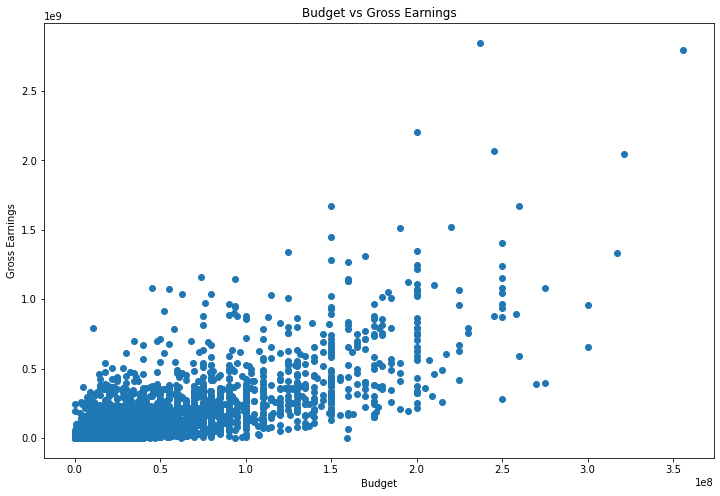

In [17]:
# Scatter plot of budget and gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")


<AxesSubplot:xlabel='budget', ylabel='gross'>

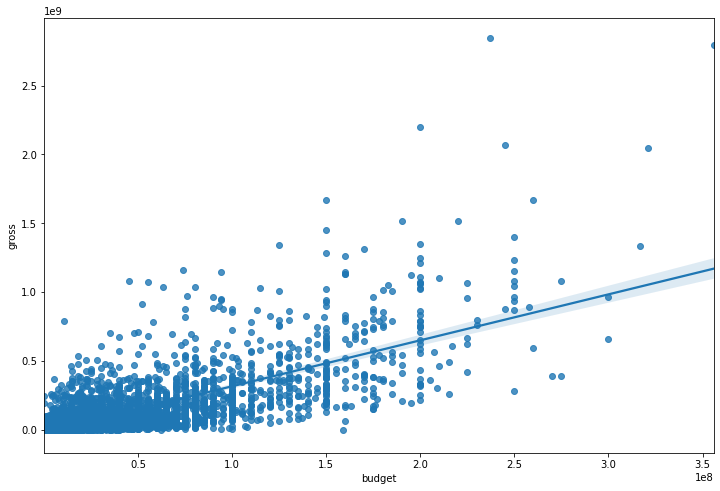

In [18]:
# Chcking for correlation
sns.regplot(x='budget', y='gross', data=df)

In [19]:
# Chcking for correlation
#sns.regplot(x='budget', y='gross', data=df, scatter_kws=["color":"red"], line_kws=["color":"blue"])

In [20]:
# Correlation

df.corr()  #Pearson(default), Spearman, Kendall.

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [21]:
df.corr(method='kendall')

year     score     votes    budget     gross   runtime
year     1.000000  0.039389  0.296512  0.220833  0.239539  0.064824
score    0.039389  1.000000  0.350185 -0.006406  0.124943  0.292254
votes    0.296512  0.350185  1.000000  0.346274  0.553625  0.205344
budget   0.220833 -0.006406  0.346274  1.000000  0.512057  0.231278
gross    0.239539  0.124943  0.553625  0.512057  1.000000  0.176979
runtime  0.064824  0.292254  0.205344  0.231278  0.176979  1.000000

In [22]:
df.corr(method='spearman')

year     score     votes    budget     gross   runtime
year     1.000000  0.057741  0.427623  0.312886  0.351045  0.095444
score    0.057741  1.000000  0.495409 -0.009971  0.183192  0.412155
votes    0.427623  0.495409  1.000000  0.493461  0.745793  0.300621
budget   0.312886 -0.009971  0.493461  1.000000  0.692958  0.330794
gross    0.351045  0.183192  0.745793  0.692958  1.000000  0.257400
runtime  0.095444  0.412155  0.300621  0.330794  0.257400  1.000000

There's a high correlation between budget and gross

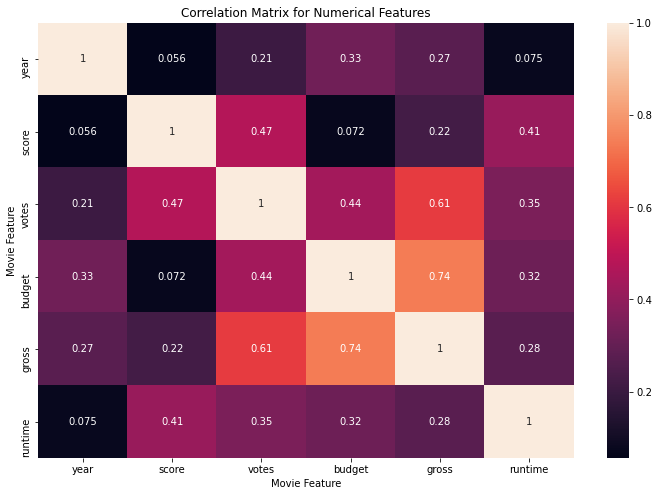

In [23]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numerical Features")
plt.xlabel("Movie Feature")
plt.ylabel("Movie Feature")

plt.show()

In [24]:
# Working with Company.

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                released  score    votes       director              writer  \
5445  December 18, 2009     7.8  1100000  James Cameron       James Cameron   
7445     April 26, 2019     8.4   903000  Anthony Russo  Christopher Markus   
3045  December 19, 1997     7.8  1100000  James Cameron       James Cameron   
6663  December 18, 2015     7.8   876000    J.J. Abrams     Lawrence Kasdan   
7244     April 27, 2018     8.4   897000  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime  
5445  Twentieth Century Fox    162.0  
7445         Marvel Studios    181.0  
3045  Twentieth Century Fox    194.0  
6663              Lucasfilm    138.0  
7244         Marvel Studios    149.0

In [25]:
df_numerized = df[:]

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtypes == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized
        

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       524    7.8  1100000       785    1263   
7445   388       5      0  2019       134    8.4   903000       105     513   
3045  4909       5      6  1997       531    7.8  1100000       785    1263   
6663  3643       5      0  2015       526    7.8   876000       768    1806   
7244   389       5      0  2018       142    8.4   897000       105     513   
7480  4388       4      2  2019      1113    6.9   222000      1012    1361   
6653  2117       5      0  2015      1288    7.0   593000       335    2523   
6043  3878       5      0  2012      1876    8.0  1300000      1060    1646   
6646  1541       5      0  2015       162    7.1   370000       809     481   
7494  1530       4      2  2019      2026    6.8   148000       277    1383   
6644   387       5      0  2015      1692    7.3   777000      1060    1646   
7247   567       5      0  2018       720    7.3   661000      1716    2687   
5845  1731       5      1  2011      1080    8.1   790000       452    2862   
7075  3644       5      0  2017       498    7.0   581000      1589    2487   
7271  2118       5      0  2018      1368    6.2   277000       764     777   
6262  1529       4      2  2013      2055    7.4   585000       277    1383   
7072   477       4      7  2017      1540    7.1   283000       155    2822   
7281  1966       4      2  2018      1310    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1858    7.1   779000      1767     837   
6688  2545       4      2  2015      1039    6.4   218000      1144     362   
6846   750       5      0  2016      1887    7.8   694000       105     513   
7250   343       5      0  2018       561    6.9   404000       809     699   
4245  4407       5      0  2003       513    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1123    7.5   359000      1019     479   
7456   755       5      0  2019      1676    6.8   478000        96     182   
5878  4950       5      0  2011      1422    6.2   390000      1302     886   
6059  3498       5      0  2012      2119    7.7   642000      1732    2221   
6494  4949       5      0  2014      1404    5.6   302000      1302     886   
2448  4388       1      2  1994      1378    8.5   970000      1685    1206   
6047  4048       5      0  2012      1130    8.4  1600000       317    1606   
7463  3640       5      0  2019       549    6.5   394000       768     489   
7450  2091       6      5  2019      2286    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1356    7.7   217000      1052    1525   
5685  4935       1      2  2010      1328    8.2   776000      1162    1525   
4852  2985       5      0  2006      1241    7.3   668000       674    2927   
6869  3260       5      0  2016       506    7.8   572000       615     492   
7481   206       4      1  2019      1815    6.9   239000       705    1468   
5860  2988       5      0  2011      1781    6.6   492000      1635    2927   
7140  1102       4      2  2017      1443    6.3   119000      1144     524   
2245  2115       5      0  1993      1277    8.1   894000      1859    2070   
6908  1411       4      2  2016      1323    7.3   250000        81     153   
3451  3637       4      0  1999      1757    6.5   748000       653    1046   
5667   215       4      1  2010      1658    6.4   392000      1918    1849   
6863  5329       4      2  2016      1652    8.0   450000       239     390   
6045  4240       5      1  2012       490    7.8   773000      1520     967   
3843  1736       4      1  2001      1963    7.6   685000       280    1236   
5243  4047       5      0  2008      1103    9.0  2400000       317    1606   
6311  1101       4      2  2013      1204    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   26400

In [26]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                released  score    votes       director              writer  \
5445  December 18, 2009     7.8  1100000  James Cameron       James Cameron   
7445     April 26, 2019     8.4   903000  Anthony Russo  Christopher Markus   
3045  December 19, 1997     7.8  1100000  James Cameron       James Cameron   
6663  December 18, 2015     7.8   876000    J.J. Abrams     Lawrence Kasdan   
7244     April 27, 2018     8.4   897000  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime  
5445  Twentieth Century Fox    162.0  
7445         Marvel Studios    181.0  
3045  Twentieth Century Fox    194.0  
6663              Lucasfilm    138.0  
7244         Marvel Studios    149.0

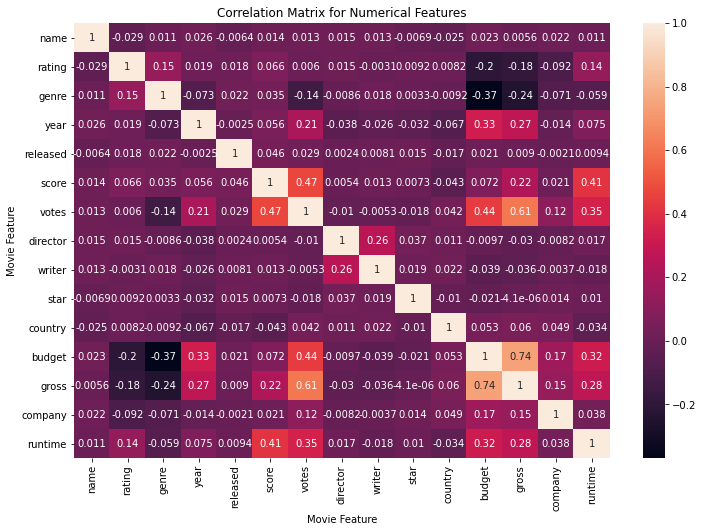

In [27]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numerical Features")
plt.xlabel("Movie Feature")
plt.ylabel("Movie Feature")

plt.show()

In [28]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006400
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.017538
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [29]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [30]:
high_corr = sorted_pairs[(sorted_pairs > 0.5)]

high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

Votes and Budget have a High Correlation to Gross